# Họ và Tên
# MSSV

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng Bilateral filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Canny Edge Detection để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi kênh màu theo thứ tự (ví dụ: BGR → BRG) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu YCrCb và tách riêng 3 kênh Y, Cr, Cb, lưu thành ảnh grayscale tương ứng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 điểm)


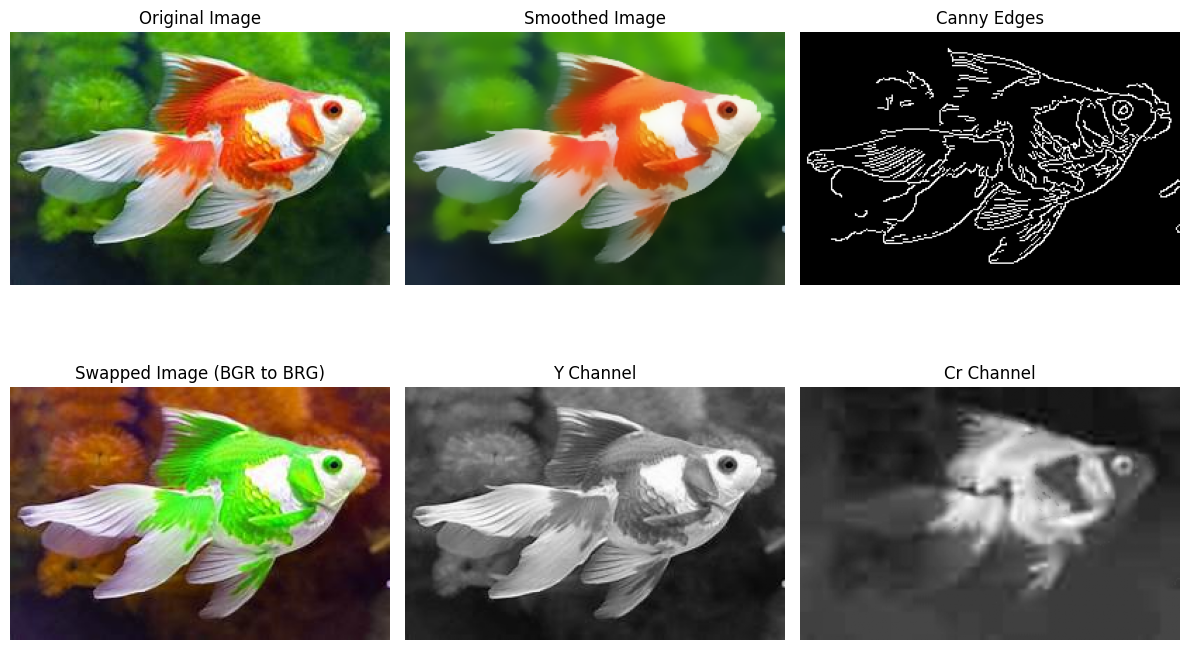

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
image = cv2.imread('a.jpg')

# Bilateral Filter 
smoothed_image = cv2.bilateralFilter(image, d=15, sigmaColor=75, sigmaSpace=75)
cv2.imwrite('result_img_c1/a_smoothed.jpg', smoothed_image)

# Canny Edge Detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
cv2.imwrite('result_img_c1/a_edges.jpg', edges)

# BGR → BRG
swapped_image = image[:, :, [0, 2, 1]]
cv2.imwrite('result_img_c1/a_swapped.jpg', swapped_image)

# YCrCb
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb_image)

# Lưu 
cv2.imwrite('result_img_c1/a_Y.jpg', Y)
cv2.imwrite('result_img_c1/a_Cr.jpg', Cr)
cv2.imwrite('result_img_c1/a_Cb.jpg', Cb)

# Hiển thị kết quả
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Smoothed Image')
plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Swapped Image (BGR to BRG)')
plt.imshow(cv2.cvtColor(swapped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Y Channel')
plt.imshow(Y, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Cr Channel')
plt.imshow(Cr, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật biến đổi hình học và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Phóng to ảnh (Zoom bằng resize) (0.5 điểm)  
* Xoay ảnh (góc ngẫu nhiên từ 0–360 độ) (0.5 điểm)  
* Lật ảnh ngang (0.5 điểm)  
* Lật ảnh dọc (0.5 điểm)  
* Cắt ảnh (crop ngẫu nhiên vùng giữa ảnh) (0.5 điểm)  
* Thêm viền (padding màu ngẫu nhiên) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 điểm)


In [13]:
import cv2
import numpy as np
import random
import os

def zoom_image(image):
    return cv2.resize(image, None, fx=1.5, fy=1.5)

def rotate_image(image):
    angle = random.uniform(0, 360)
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)
    return cv2.warpAffine(image, M, (w, h))

def horizontal_flip(image):
    return cv2.flip(image, 1)

def vertical_flip(image):
    return cv2.flip(image, 0)

def crop_image(image):
    h, w = image.shape[:2]
    x = w // 4
    y = h // 4
    return image[y:y + h // 2, x:x + w // 2]

def add_padding(image):
    top = random.randint(5, 50)
    bottom = random.randint(5, 50)
    left = random.randint(5, 50)
    right = random.randint(5, 50)
    color = tuple(random.randint(0, 255) for _ in range(3))
    return cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

def process_images(images, operation):
    for img_path in images:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Không thể đọc ảnh: {img_path}")
            continue
        
        # Xử lý ảnh dựa trên phương pháp đã chọn
        if operation == 'Z':
            processed_img = zoom_image(img)
            method = 'zoom'
        elif operation == 'T':
            processed_img = rotate_image(img)
            method = 'rotate'
        elif operation == 'H':
            processed_img = horizontal_flip(img)
            method = 'horizontal_flip'
        elif operation == 'V':
            processed_img = vertical_flip(img)
            method = 'vertical_flip'
        elif operation == 'C':
            processed_img = crop_image(img)
            method = 'crop'
        elif operation == 'P':
            processed_img = add_padding(img)
            method = 'padding'
        else:
            print("Phương pháp không hợp lệ.")
            continue
        
        # Lưu ảnh đã xử lý
        base_name = os.path.basename(img_path)
        result_name = f"result_img_c2/result_{method}_{base_name}"
        cv2.imwrite(result_name, processed_img)
        print(f"Lưu ảnh đã xử lý: {result_name}")

def main():
    # Đọc ảnh
    images = ['a.jpg', 'b.jpg', 'c.jpg']
    
    print("\nChọn phương pháp xử lý:")
    print("Z: Phóng to ảnh")
    print("T: Xoay ảnh")
    print("H: Lật ảnh ngang")
    print("V: Lật ảnh dọc")
    print("C: Cắt ảnh")
    print("P: Thêm viền")

    operation = input("Nhập phím tương ứng: ").upper()
    process_images(images, operation)

if __name__ == "__main__":
    main()


Chọn phương pháp xử lý:
Z: Phóng to ảnh
T: Xoay ảnh
H: Lật ảnh ngang
V: Lật ảnh dọc
C: Cắt ảnh
P: Thêm viền
Lưu ảnh đã xử lý: result_img_c2/result_padding_a.jpg
Lưu ảnh đã xử lý: result_img_c2/result_padding_b.jpg
Lưu ảnh đã xử lý: result_img_c2/result_padding_c.jpg


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Thêm viền đen 20 pixel cho ảnh đầu tiên. (0.5 điểm)  
* Xoay ảnh thứ hai 45 độ và phóng to 1.5 lần. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 4 lần, sau đó áp dụng Bilateral Filter với tham số tùy chọn. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [ ]:
import cv2
import numpy as np
import os

def add_padding(image, padding_size=20):
    return cv2.copyMakeBorder(image, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT, value=(0, 0, 0))

def rotate_and_zoom_image(image, angle=45, scale=1.5):
    h, w = image.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, M, (int(w * scale), int(h * scale)))

def enlarge_image(image, scale=4):
    return cv2.resize(image, None, fx=scale, fy=scale)

def apply_bilateral_filter(image, d=15, sigmaColor=75, sigmaSpace=75):
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

def main():
    # Đọc ảnh
    images = ['a.jpg', 'b.jpg', 'c.jpg']
    
    # 1. Thêm viền đen 20 pixel cho ảnh đầu tiên
    img1 = cv2.imread(images[0])
    img1_padded = add_padding(img1)
    cv2.imwrite(f"result_img_c3/result_padded_{os.path.basename(images[0])}", img1_padded)
    print(f"Lưu ảnh đã thêm viền: result_padded_{os.path.basename(images[0])}")

    # 2. Xoay ảnh 
    img2 = cv2.imread(images[1])
    img2_rotated_zoomed = rotate_and_zoom_image(img2)
    cv2.imwrite(f"result_img_c3/result_rotated_zoomed_{os.path.basename(images[1])}", img2_rotated_zoomed)
    print(f"Lưu ảnh đã xoay và phóng to: result_rotated_zoomed_{os.path.basename(images[1])}")

    # 3. Tăng kích thước 
    img3 = cv2.imread(images[2])
    img3_enlarged = enlarge_image(img3)
    img3_filtered = apply_bilateral_filter(img3_enlarged)
    cv2.imwrite(f"result_img_c3/result_filtered_{os.path.basename(images[2])}", img3_filtered)
    print(f"Lưu ảnh đã phóng to và áp dụng Bilateral Filter: result_filtered_{os.path.basename(images[2])}")

if __name__ == "__main__":
    main()

Lưu ảnh đã thêm viền: result_padded_a.jpg
Lưu ảnh đã xoay và phóng to: result_rotated_zoomed_b.jpg
Lưu ảnh đã phóng to và áp dụng Bilateral Filter: result_filtered_c.jpg


# Chúc các bạn thi may mắn và đạt điểm 10.